In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


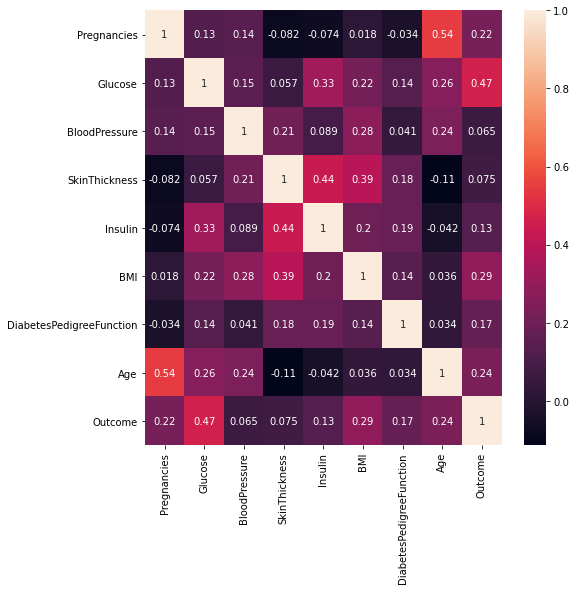

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot = True);

In [7]:
df.iloc[:,:-1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
col=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
for i in col:
    df[i].replace(0,np.nan, inplace = True)
zeros = df==0
print(zeros.sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [9]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

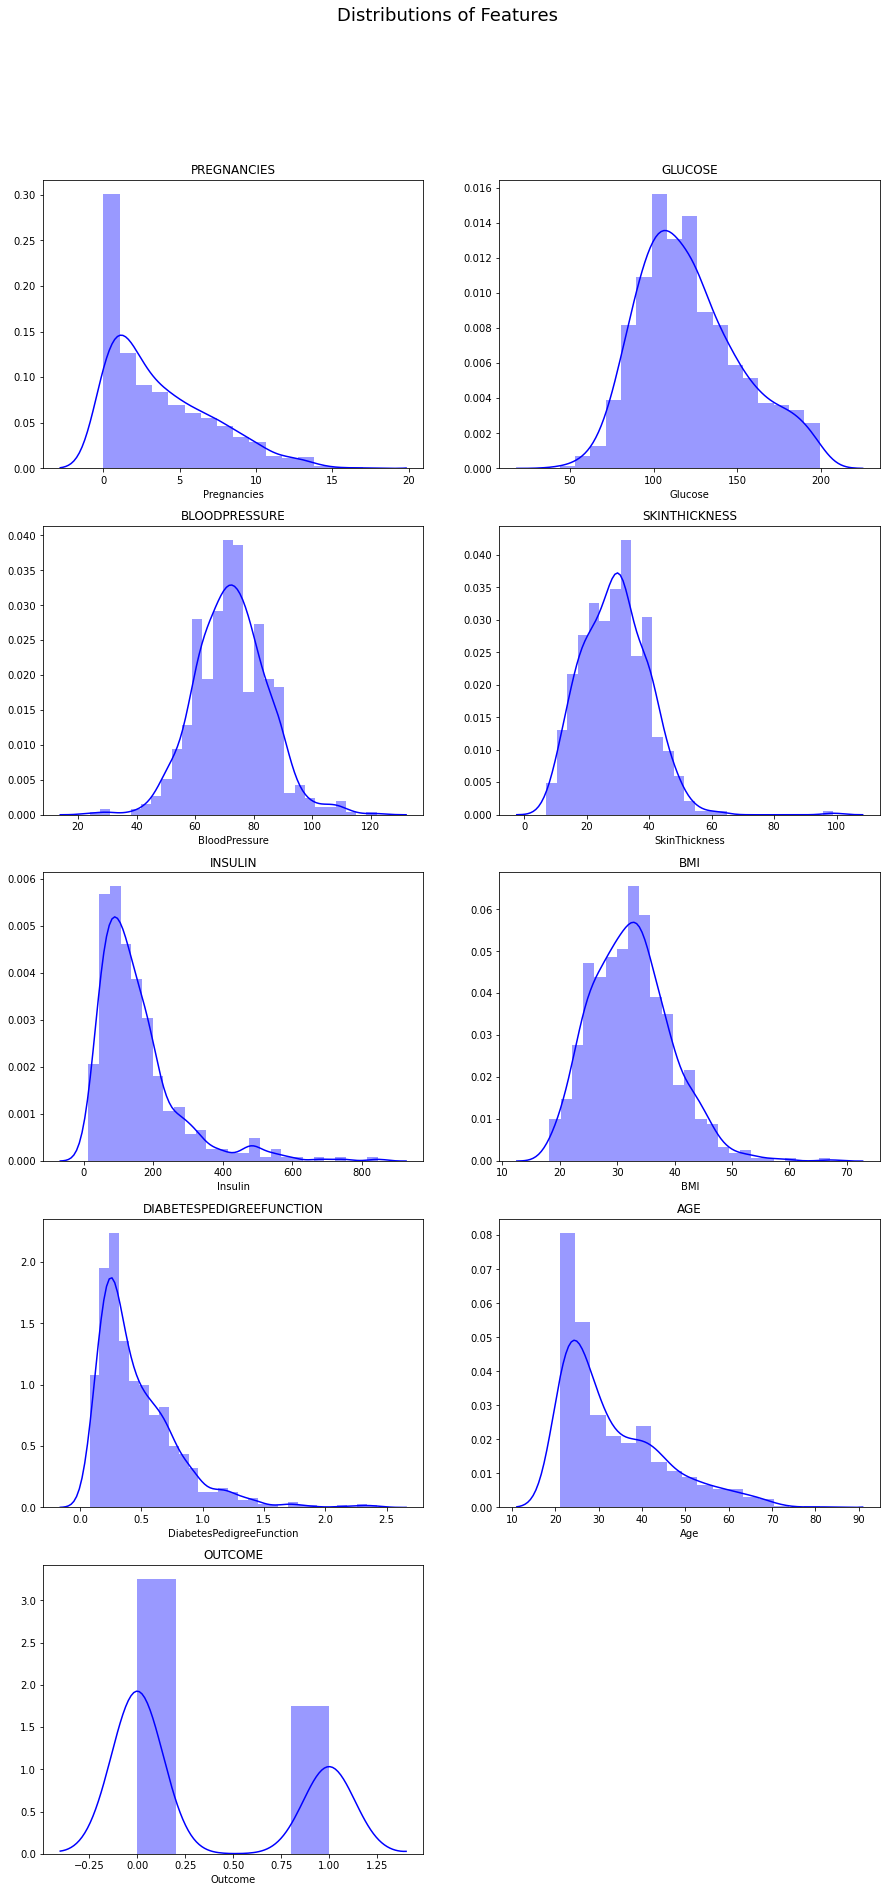

In [10]:
plt.figure(figsize = (15,30))
for col in enumerate(df):
    plt.subplot(5,2,col[0]+1)
    sns.distplot(df[col[1]],color= "blue")
    plt.suptitle("Distributions of Features",size = 18)
    plt.title(f"{col[1].upper()}")
    plt.subplots_adjust(top = 0.9)

In [11]:
column = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in column:
    df.loc[df["Outcome"]==0,col]=df.loc[df["Outcome"]==0,col].fillna(df[df["Outcome"]==0][col].mean())
    df.loc[df["Outcome"]==1,col]=df.loc[df["Outcome"]==1,col].fillna(df[df["Outcome"]==1][col].mean())

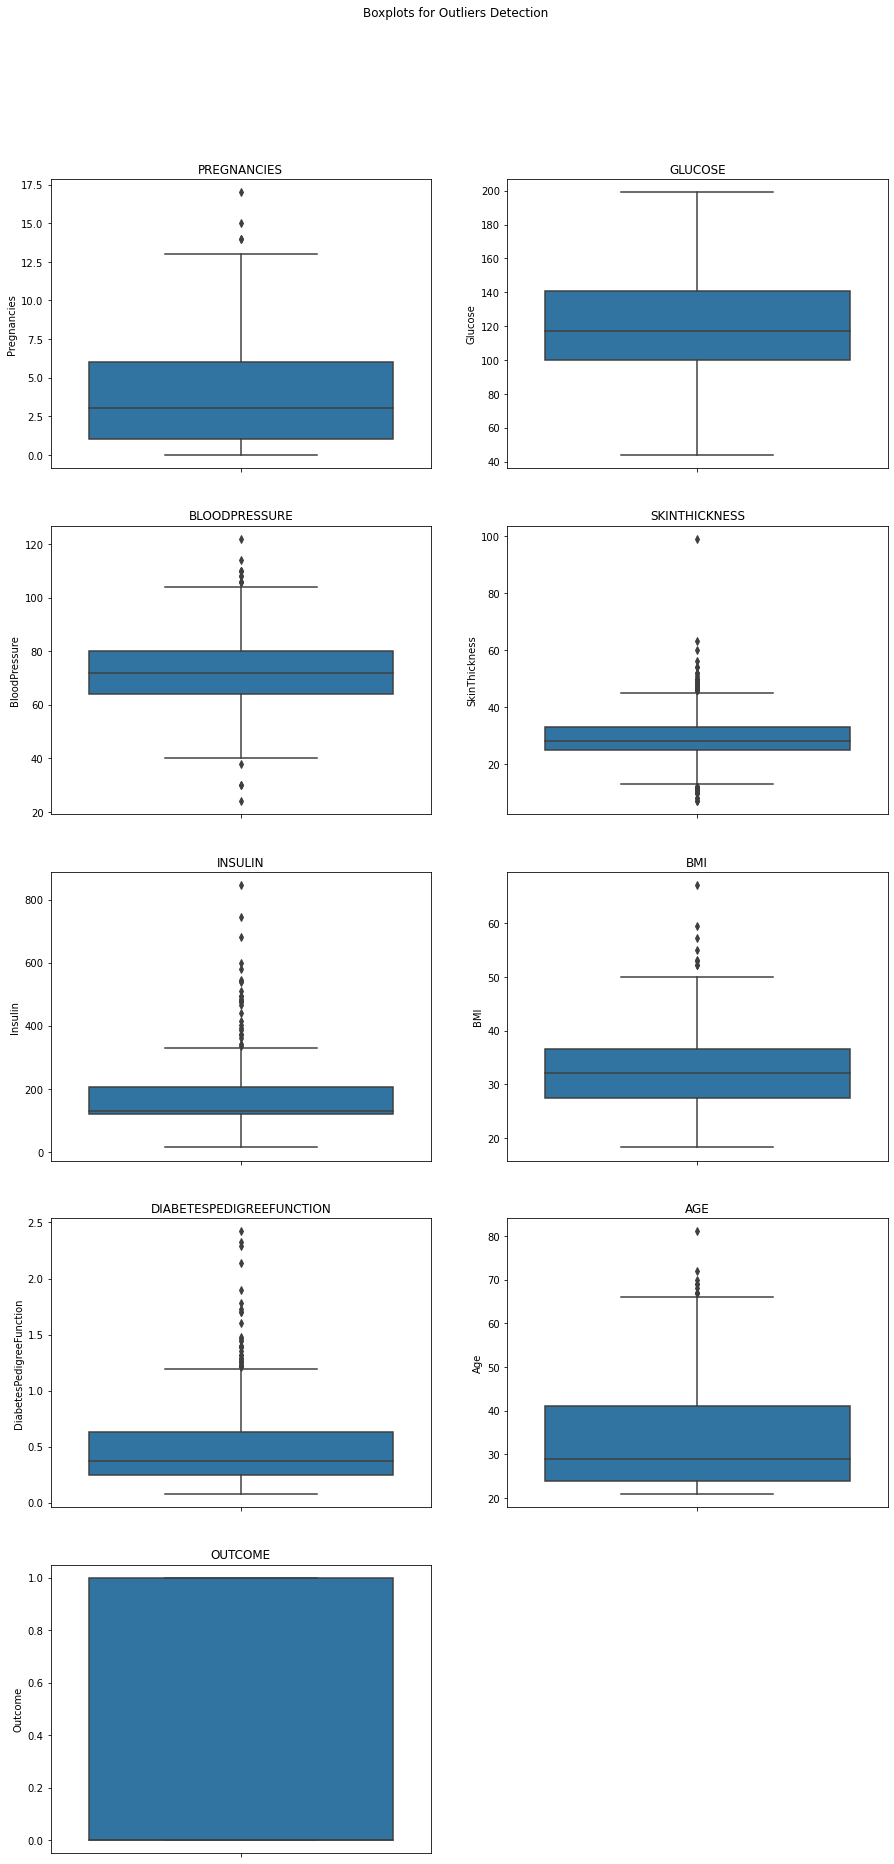

In [12]:
plt.figure(figsize=(15,30))
for col in enumerate(df):
    plt.subplot(5,2,col[0]+1)
    sns.boxplot(y=col[1],data = df)
    plt.suptitle("Boxplots for Outliers Detection")
    plt.title(f"{col[1].upper()}")
    plt.subplots_adjust(top = 0.9)

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1


min_bound = Q1 - 1.5 * IQR
max_bound = Q3 + 1.5 * IQR


df_out = df[~((df < (min_bound)) | (df > (max_bound))).any(axis=1)]
print("Before:",df.shape, "After:",df_out.shape)

Before: (768, 9) After: (637, 9)


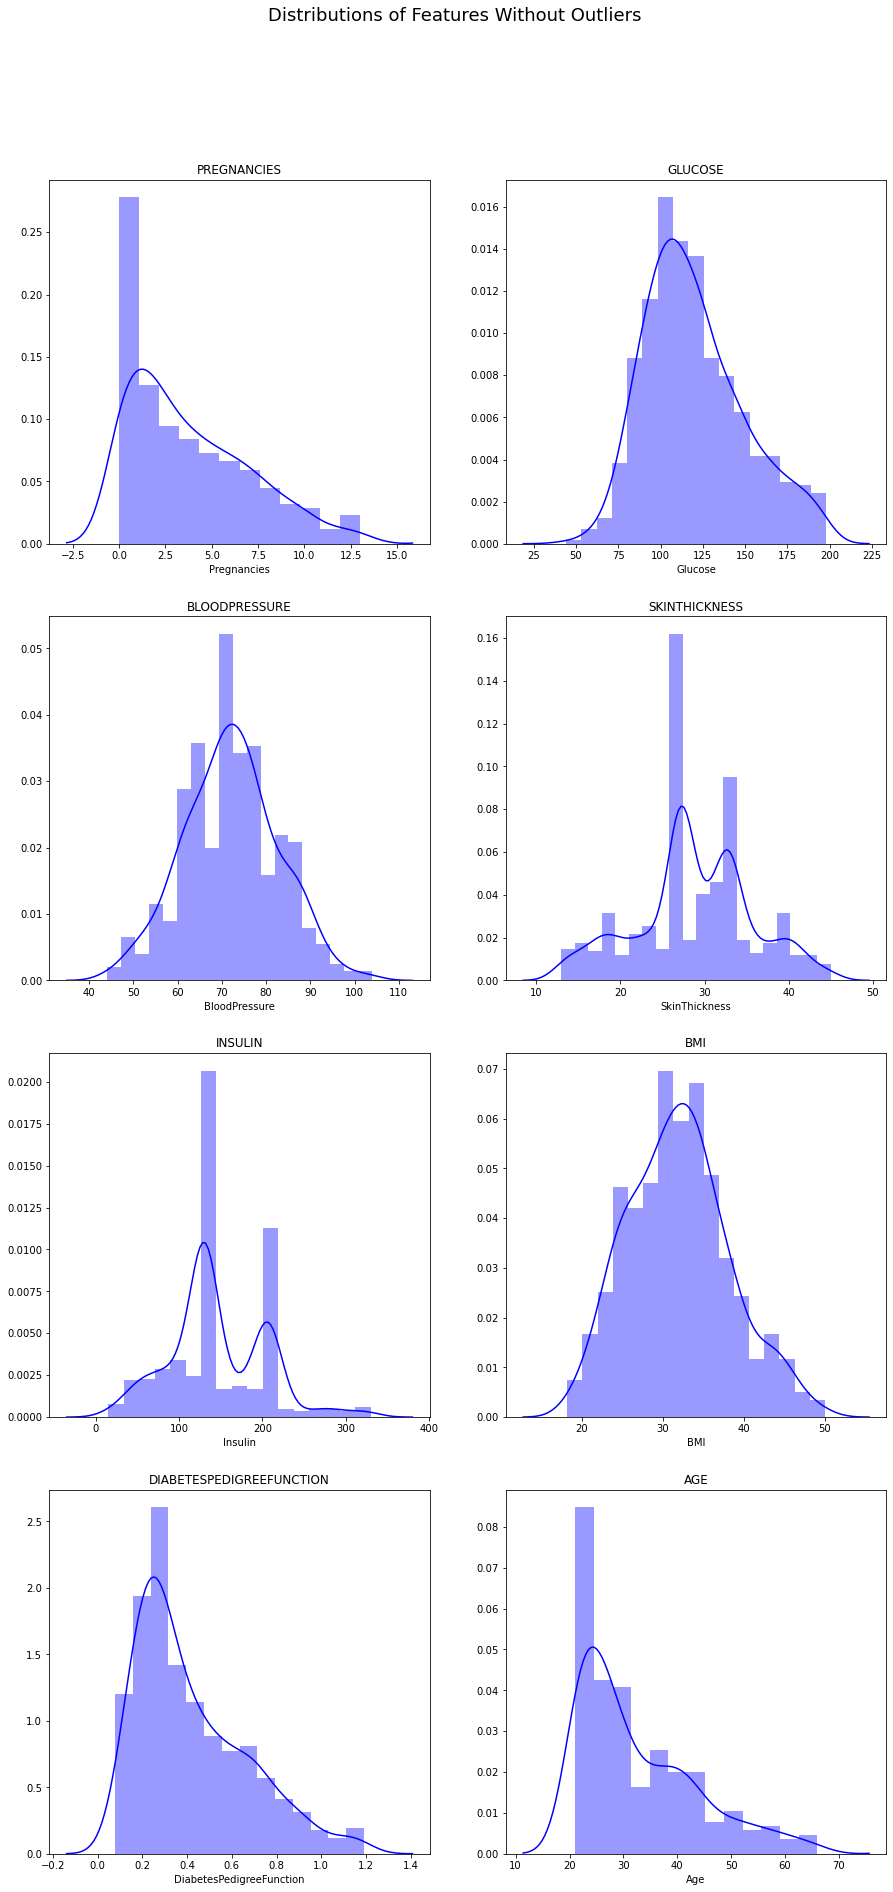

In [14]:
colms = df_out.drop("Outcome", axis = 1)

plt.figure(figsize=(15,30))
for col in enumerate(colms):
    plt.subplot(4,2,col[0]+1)
    sns.distplot(colms[col[1]],color= "b")
    plt.suptitle("Distributions of Features Without Outliers",size = 18)
    plt.title(f"{col[1].upper()}")
    plt.subplots_adjust(top=0.9) 

In [15]:
df_out.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,3.846154,119.980488,72.101434,28.761599,144.975078,31.953110,0.420810,32.684458,0.331240
std,3.244474,29.445763,10.662977,6.903005,57.391833,6.250218,0.247977,11.012113,0.471029
min,0.000000,44.000000,44.000000,13.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,26.000000,125.000000,27.400000,0.237000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,27.235457,130.287879,32.000000,0.343000,29.000000,0.000000
75%,6.000000,138.000000,78.000000,33.000000,206.846154,35.800000,0.583000,40.000000,1.000000
max,13.000000,198.000000,104.000000,45.000000,330.000000,50.000000,1.191000,66.000000,1.000000


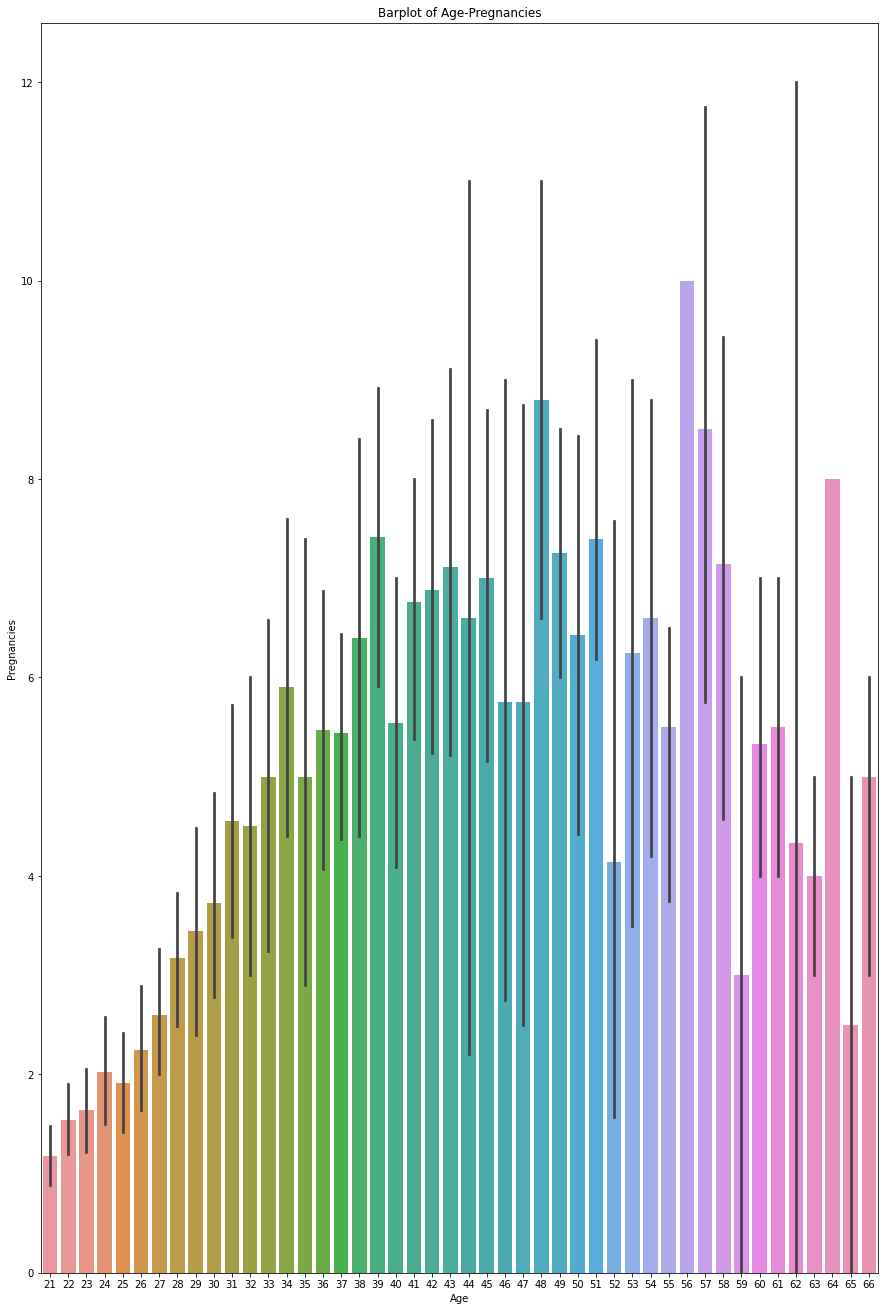

In [16]:
plt.figure(figsize=(15,23))
sns.barplot(x ="Age",y = "Pregnancies", data = df_out);
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.title("Barplot of Age-Pregnancies");

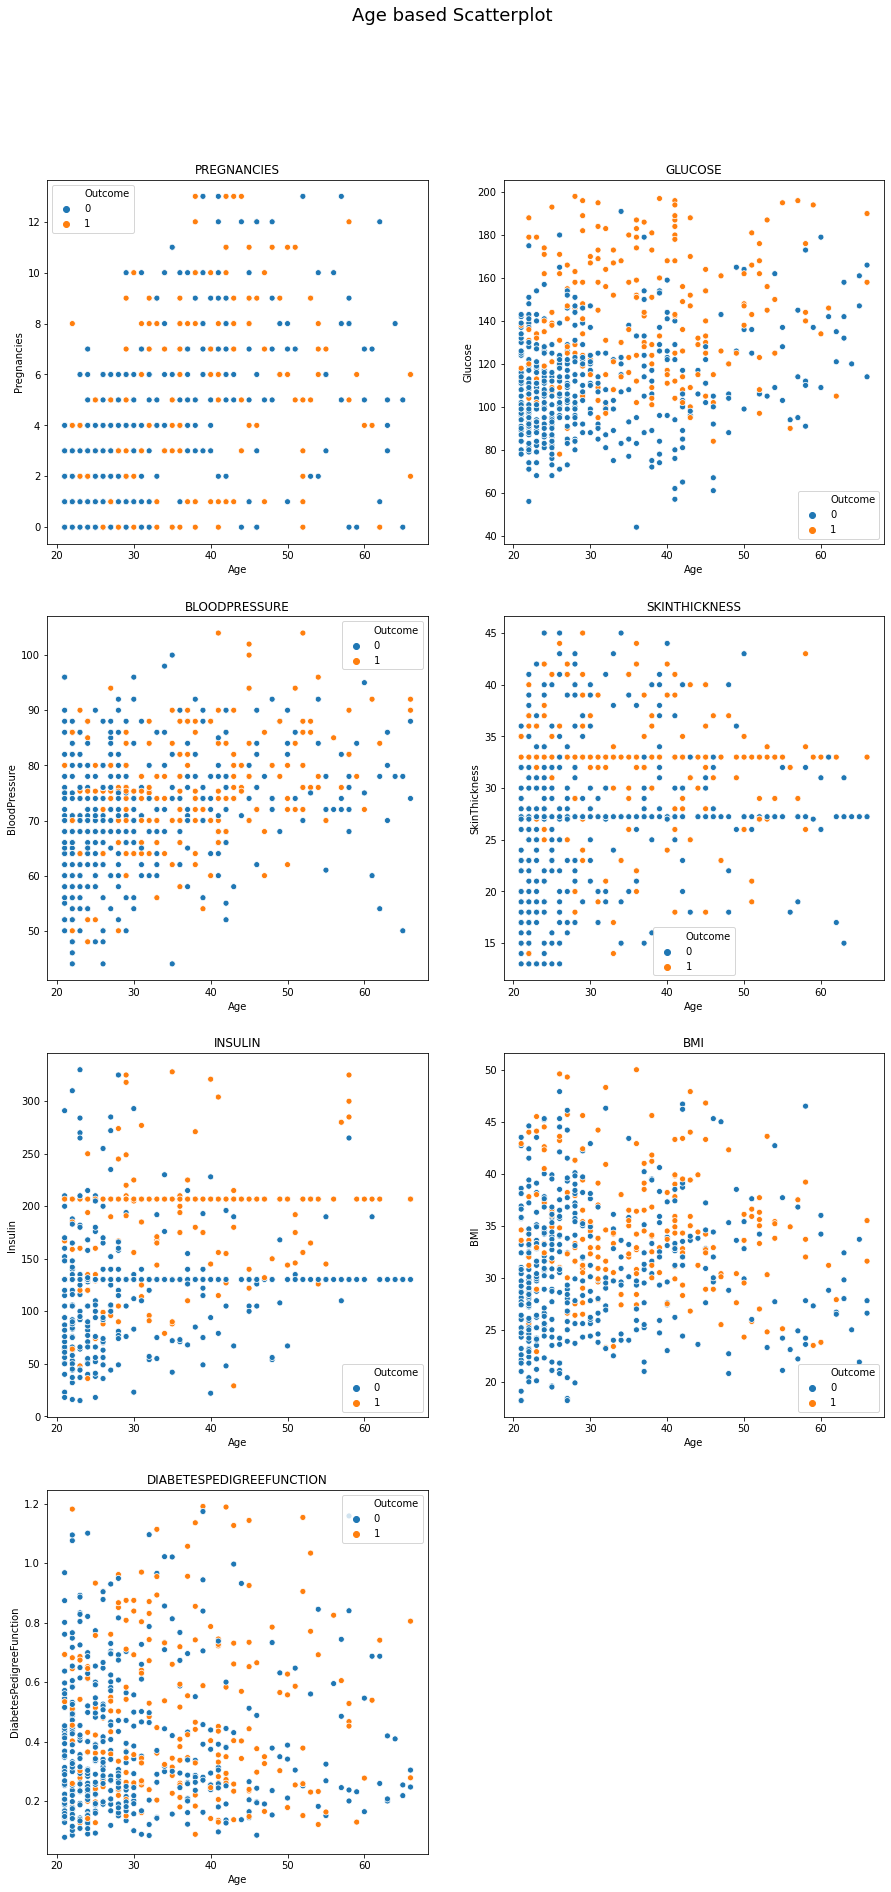

In [17]:
cols = df.iloc[:,:-2]

plt.figure(figsize=(15,30))
for col in enumerate(cols):
    plt.subplot(4,2,col[0]+1)
    sns.scatterplot(x= "Age", y= col[1],hue = "Outcome",data=df_out)
    plt.suptitle("Age based Scatterplot",size = 18)
    plt.title(f"{col[1].upper()}")
    plt.subplots_adjust(top=0.9) 

In [18]:
X = df_out.drop('Outcome', axis=1)
y = df_out['Outcome']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

In [21]:
print("X Train: ",X_train.shape)
print("X Test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X Train:  (477, 8)
X Test:  (160, 8)
y train:  (477,)
y test:  (160,)


In [22]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [23]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    
    plt.figure(figsize=(12,8))
    plot_confusion_matrix(model,X_test, y_test)

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

Test_Set
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       109
           1       0.87      0.76      0.81        51

    accuracy                           0.89       160
   macro avg       0.88      0.85      0.87       160
weighted avg       0.89      0.89      0.89       160

Train_Set
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       317
           1       0.81      0.71      0.76       160

    accuracy                           0.85       477
   macro avg       0.84      0.81      0.82       477
weighted avg       0.84      0.85      0.84       477



<Figure size 864x576 with 0 Axes>

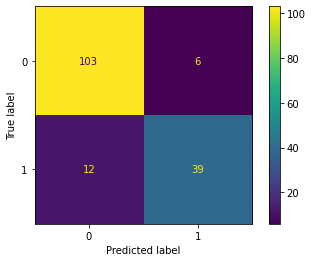

In [26]:
eval(model,X_train,X_test)

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [28]:
clf_params = {"max_depth": range(1,10),
             "min_samples_split": list(range(2,15))}

In [29]:
clf_model = GridSearchCV(clf,clf_params, cv =10, n_jobs = -1,verbose = 2)
clf_model.fit(X_train,y_train)

Fitting 10 folds for each of 117 candidates, totalling 1170 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1170 out of 1170 | elapsed:    5.9s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14]},
             verbose=2)

In [30]:
clf_model.best_params_

{'max_depth': 6, 'min_samples_split': 9}

In [31]:
clf_tuned = DecisionTreeClassifier(max_depth = 5,
                                  min_samples_split = 7)
clf_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=7)

Test_Set
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       109
           1       0.90      0.71      0.79        51

    accuracy                           0.88       160
   macro avg       0.89      0.83      0.85       160
weighted avg       0.88      0.88      0.88       160

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       317
           1       0.95      0.92      0.93       160

    accuracy                           0.96       477
   macro avg       0.95      0.95      0.95       477
weighted avg       0.96      0.96      0.96       477



<Figure size 864x576 with 0 Axes>

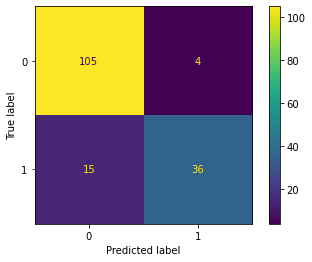

In [32]:
eval(clf_tuned,X_train,X_test)

## KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [34]:
knn_params = {"n_neighbors":np.arange(1,50)}

In [35]:
KNN_model = GridSearchCV(KNN,knn_params,cv=10)
KNN_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [36]:
print(KNN_model.best_params_)
print(KNN_model.best_score_)

{'n_neighbors': 2}
0.884663120567376


In [37]:
KNN_tuned = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)

Test_Set
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       109
           1       0.88      0.73      0.80        51

    accuracy                           0.88       160
   macro avg       0.88      0.84      0.86       160
weighted avg       0.88      0.88      0.88       160

Train_Set
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       317
           1       1.00      0.81      0.89       160

    accuracy                           0.94       477
   macro avg       0.96      0.90      0.92       477
weighted avg       0.94      0.94      0.93       477



<Figure size 864x576 with 0 Axes>

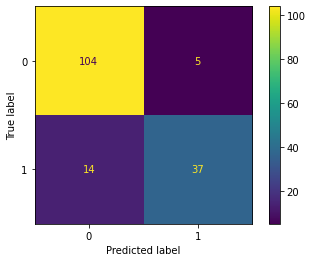

In [38]:
eval(KNN_model,X_train,X_test)

## XGBoost

In [39]:
from xgboost import XGBClassifier


XGB_params = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

XGB_model = GridSearchCV(XGBClassifier(),XGB_params,cv=5)
XGB_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [40]:
XGB_model.best_params_

{'colsample_bytree': 1.0,
 'gamma': 1,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.8}

In [41]:
XGB_tuned = XGBClassifier(colsample_bytree = 1.0,
                         gamma = 1,
                         max_depth = 5,
                         min_child_weight = 1,
                         subsample = 0.8)
                          

Test_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       109
           1       0.91      0.78      0.84        51

    accuracy                           0.91       160
   macro avg       0.91      0.87      0.89       160
weighted avg       0.91      0.91      0.90       160

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      0.99      1.00       160

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477



<Figure size 864x576 with 0 Axes>

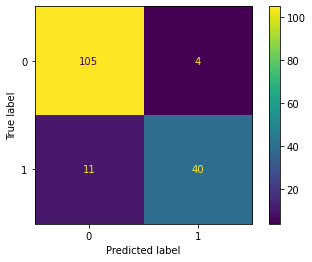

In [42]:
eval(XGB_model,X_train,X_test)

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_params = {"max_depth":[3,5,7,10],
            "max_features": [8,10,12,15,18],
            "n_estimators": [8,10,12,15,17]}
rf = RandomForestClassifier()

In [45]:
rf_model_cv = GridSearchCV(rf,rf_params,cv=5,n_jobs = -1)

In [46]:
rf_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': [8, 10, 12, 15, 18],
                         'n_estimators': [8, 10, 12, 15, 17]})

In [47]:
rf_model_cv.best_params_

{'max_depth': 10, 'max_features': 8, 'n_estimators': 17}

In [48]:
rf_tuned = RandomForestClassifier(max_depth=10,
                                 max_features=8,
                                 min_samples_split=3,
                                 n_estimators=12)

In [49]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=3,
                       n_estimators=12)

Test_Set
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       109
           1       0.95      0.73      0.82        51

    accuracy                           0.90       160
   macro avg       0.92      0.85      0.88       160
weighted avg       0.90      0.90      0.90       160

Train_Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       317
           1       0.99      0.96      0.98       160

    accuracy                           0.99       477
   macro avg       0.99      0.98      0.98       477
weighted avg       0.99      0.99      0.99       477



<Figure size 864x576 with 0 Axes>

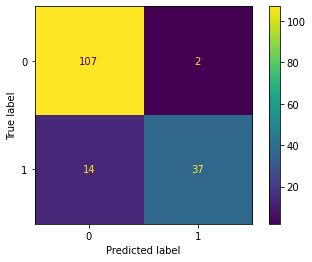

In [50]:
eval(rf_tuned,X_train,X_test)